## Problem 3: How many people live near shopping centers? (8 points)

In the last step of this analysis, use a *spatial join* to relate data from a population grid data set to the buffer layer created in *problem 2* to find out how many people live in all population grid cells that are **within** 1.5 km distance from each shopping centre. 

Use the same population grid data set as during [lesson 3](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-3/spatial-join.html) (load it directly from WFS, don’t forget to assign a CRS).


*Feel free to divide your solution into more codeblocks than prepared! Remember to add comments to your code :)*

### a) Load the population grid data set and the buffer geometries (2 points)

Use the same population grid data set as during [lesson 3](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-3/spatial-join.html) (load it directly from WFS, don’t forget to assign a CRS). Load the data into a `GeoDataFrame` called `population_grid`.

(optional) If you want, discard unneeded columns and translate the remaining column names from Finnish to English.

In [21]:
# ADD YOUR OWN CODE HERE
import pathlib 
import geopandas
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / "static" / "data"

addresses = geopandas.read_file(DATA_DIRECTORY / "addresses.gpkg")

DATA_DIR2 = NOTEBOOK_PATH / "static" / "data" / "Vaestotietoruudukko_2020_shp"
population_grid = geopandas.read_file(DATA_DIR2 / "Vaestotietoruudukko_2020.shp")
population_grid = population_grid.to_crs("EPSG:3879")

population_grid = population_grid[["ASUKKAITA", "geometry"]]
population_grid = population_grid.rename(columns={"ASUKKAITA": "population"})
population_grid.head()

,population,geometry
0,5,"POLYGON ((25472499.995 6685998.998, 25472499.9..."
1,8,"POLYGON ((25472499.995 6684249.004, 25472499.9..."
2,5,"POLYGON ((25472499.995 6683999.005, 25472499.9..."
3,13,"POLYGON ((25472499.995 6682998.998, 25472499.9..."
4,5,"POLYGON ((25472749.993 6690249.003, 25472749.9..."


In [22]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
import geopandas
import pyproj

assert isinstance(population_grid, geopandas.GeoDataFrame)
assert population_grid.crs == pyproj.CRS("EPSG:3879")

<AxesSubplot: >

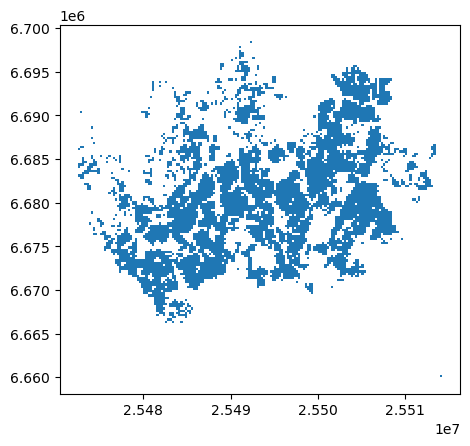

In [23]:
population_grid.plot()



Load the buffers computed in *problem 2* into a `GeoDataFrame` called `shopping_centre_buffers`. Add an `assert` statement to check whether the two data frames are in the same CRS.

In [24]:
# ADD YOUR OWN CODE HERE
shopping_centre_buffers = geopandas.read_file(DATA_DIRECTORY / "shopping_centres.gpkg",
                                              layer = 'shopping_centres_buffered')
shopping_centre_buffers.crs

<Derived Projected CRS: EPSG:3879>
Name: ETRS89 / GK25FIN
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Finland - nominally onshore between 24°30'E and 25°30'E but may be used in adjacent areas if a municipality chooses to use one zone over its whole extent.
- bounds: (24.5, 59.94, 25.5, 68.9)
Coordinate Operation:
- name: Finland Gauss-Kruger zone 25
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [25]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
assert isinstance(shopping_centre_buffers, geopandas.GeoDataFrame)
assert shopping_centre_buffers.geometry.geom_type.unique() == ["Polygon"]
assert shopping_centre_buffers.crs == pyproj.CRS("EPSG:3879")

In [27]:
shopping_centre_buffers.head()

,address,id,name,addr,geometry
0,"Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...",1,Itis,"Itäkatu 1-7, 00930 Helsinki, Finland","POLYGON ((25504600.102 6677662.109, 25504600.0..."
1,"Funky Lady, 14-20, Mannerheimintie, Keskusta, ...",2,Forum,"Mannerheimintie 14–20, 00100 Helsinki, Finland","POLYGON ((25496550.812 6672862.540, 25496550.8..."
2,"Matinkylä (M), laituri 5, 11, Piispansilta, Ma...",3,Iso-omena,"Piispansilta 11, 02230 Espoo, Finland","POLYGON ((25485493.945 6671951.458, 25485493.9..."
3,"Life, 3-9, Leppävaarankatu, Ruusutorppa, Etelä...",4,Sello,"Leppävaarankatu 3-9, 02600 Espoo, Finland","POLYGON ((25489652.883 6678394.318, 25489652.8..."
4,"Jumbo, 3, Vantaanportinkatu, Vantaanportti, Pa...",5,Jumbo,"Vantaanportinkatu 3, 01510 Vantaa, Finland","POLYGON ((25498103.192 6686561.206, 25498103.1..."


In [19]:
shopping_centre_buffers.crs

<Derived Projected CRS: EPSG:3879>
Name: ETRS89 / GK25FIN
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Finland - nominally onshore between 24°30'E and 25°30'E but may be used in adjacent areas if a municipality chooses to use one zone over its whole extent.
- bounds: (24.5, 59.94, 25.5, 68.9)
Coordinate Operation:
- name: Finland Gauss-Kruger zone 25
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich


---

### b) Carry out a *spatial join* between the `population_grid` and the `shopping_centre_buffers`  (2 points)

Join the shopping centre’s `id` column (and others, if you want) to the population grid data frame, for all population grid cells that are **within** the buffer area of each shopping centre. [Use a *join-type* that retains only rows from both input data frames for which the geometric predicate is true](https://geopandas.org/en/stable/gallery/spatial_joins.html#Types-of-spatial-joins). 


In [29]:
pop_df = shopping_centre_buffers.sjoin(population_grid, 
                                       how='inner',
                                       predicate="within")
pop_df.head()

,address,id,name,addr,geometry,index_right,population
1,"Funky Lady, 14-20, Mannerheimintie, Keskusta, ...",2,Forum,"Mannerheimintie 14–20, 00100 Helsinki, Finland","POLYGON ((25496550.812 6672862.540, 25496550.8...",3438,133
2,"Matinkylä (M), laituri 5, 11, Piispansilta, Ma...",3,Iso-omena,"Piispansilta 11, 02230 Espoo, Finland","POLYGON ((25485493.945 6671951.458, 25485493.9...",1379,652
3,"Life, 3-9, Leppävaarankatu, Ruusutorppa, Etelä...",4,Sello,"Leppävaarankatu 3-9, 02600 Espoo, Finland","POLYGON ((25489652.883 6678394.318, 25489652.8...",2207,282
5,"JYSK, 5, Hermannin rantatie, Verkkosaari, Kala...",6,REDI,"Hermannin rantatie 5, 00580 Helsinki, Finland","POLYGON ((25498891.345 6674874.269, 25498891.3...",3825,647
6,"Mall of Tripla, 1, Fredikanterassi, Keski-Pasi...",7,Tripla,"Fredikanterassi 1, 00520 Helsinki, Finland","POLYGON ((25496147.158 6676164.227, 25496147.1...",3355,534



---

### c) Compute the population sum around shopping centres (2 points)

Group the resulting (joint) data frame by shopping centre (`id` or `name`), and calculate the `sum()` of the population living inside the 1.5 km radius around them.

Print the results, for instance, in the form "12345 people live within 1.5 km from REDI".

In [31]:
pop_df_grouped = pop_df.groupby(['name']).sum()
pop_df_grouped.head()

/var/folders/3b/tt4qp8jn3_zg_0fpwkxc61f80000gp/T/ipykernel_16076/3461678350.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pop_df_grouped = pop_df.groupby(['name']).sum()


,id,index_right,population
name,,,
Forum,2,3438,133
Iso-omena,3,1379,652
REDI,6,3825,647
Sello,4,2207,282
Tripla,7,3355,534


In [33]:
for index, row in pop_df_grouped.iterrows():
  print(f"There are {row['population']} living in {index}")

There are 133 living in Forum
There are 652 living in Iso-omena
There are 647 living in REDI
There are 282 living in Sello
There are 534 living in Tripla



---

### d) Reflection

Good job! You are almost done with this week’s exercise. Please quickly answer the following short questions:
    
- How challenging did you find problems 1-3 (on scale to 1-5), and why?
- What was easy?
- What was difficult?

Add your answers in a new *Markdown* cell below: